In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle
import math
from datetime import date, datetime, time, timedelta

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Staff suggestion

In [48]:
# load the models from disk
filename_p = '/content/drive/My Drive/Team Abraca-DATA/Prediction/XGBoost_passengers.sav'
model_p = pickle.load(open(filename_p, 'rb'))
filename_e = '/content/drive/My Drive/Team Abraca-DATA/Prediction/XGBoost_employees.sav'
model_e = pickle.load(open(filename_e, 'rb'))
filename_h = '/content/drive/My Drive/Team Abraca-DATA/Prediction/XGBoost_hours.sav'
model_h = pickle.load(open(filename_h, 'rb'))

[11:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:19:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [49]:
test_inp = input("enter day,month,building and level: ")

enter day,month,building and level: 4,5,1,1


In [0]:
#input
model_input = test_inp.split(",")
model_input = [int(x) for x in model_input]
model_input.insert(2,0)
x = []
#passengers
y_p = []
#employees
y_e = []
#mean_wait_hours
y_h = []
for hour in range(24):
  x.append(hour)
  model_input[2] = hour
  model_df = pd.DataFrame([model_input],columns = ["day","month","hour","Building","Level"])
  y_pred_model_p = model_p.predict(model_df)  
  y_pred_model_e = model_e.predict(model_df)
  y_pred_model_h = model_h.predict(model_df)
  y_p.append(math.ceil(abs(y_pred_model_p[0])))
  y_e.append(math.ceil(abs(y_pred_model_e[0])))
  y_h.append(abs(y_pred_model_h[0]))

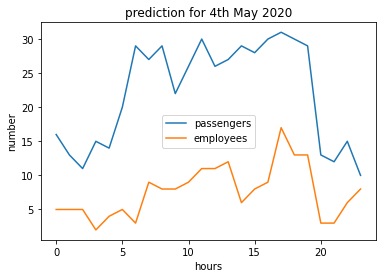

In [51]:
plt.plot(x, y_p, label='passengers')
plt.plot(x, y_e, label='employees')
plt.xlabel("hours")
plt.ylabel("number")
plt.title("prediction for 4th May 2020")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


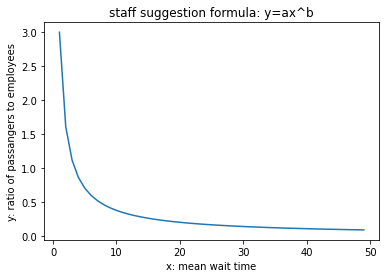

In [52]:
#plot staff suggestion formula
x=np.array(range(50))
y=3*x**(-0.9)
plt.plot(x,y)
plt.xlabel("x: mean wait time")
plt.ylabel("y: ratio of passangers to employees")
plt.title("staff suggestion formula: y=ax^b")
plt.show()

In [0]:
suggested = []

for hour in range(24):
  curr_p = y_p[hour]
  curr_h = y_h[hour]
  # formula
  a = 3
  b = -0.9 # to be changed
  ratio = a*curr_h**b
  suggested_e = curr_p/ratio
  suggested.append(suggested_e)

ValueError: ignored

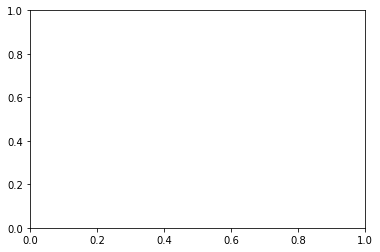

In [56]:
plt.plot(x, y_p, label='passengers')
plt.plot(x, y_e, label='current employees')
# plt.plot(x, y_h, label='mean wait hours')
plt.plot(x, suggested, label='suggested employees')
plt.xlabel("hours")
plt.ylabel("number")
plt.title("prediction for 4th May 2020")
plt.legend()
plt.show()

In [0]:
temp = pd.DataFrame()
temp['passengers'] = y_p
temp['suggested_employees'] = suggested
temp['historical_employees'] = y_e
temp['historical_ratio'] = temp['passengers']/temp['historical_employees']
temp['ratio'] = temp['passengers']/temp['suggested_employees']
temp['mean_wait_hours']=y_h

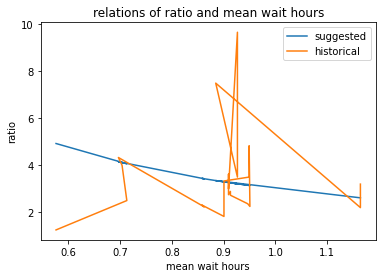

In [13]:
plt.plot(temp['mean_wait_hours'],temp['ratio'], label='suggested')
plt.plot(temp['mean_wait_hours'],temp['historical_ratio'], label='historical')
plt.xlabel('mean wait hours')
plt.ylabel('ratio')
plt.title("relations of ratio and mean wait hours")
plt.legend()
plt.show()

In [0]:
temp['suggested_employees'] = temp['suggested_employees'].apply(lambda x: math.ceil(x))

In [0]:
temp['hour'] =temp.index

In [16]:
temp

passengers  suggested_employees  ...  mean_wait_hours  hour
0           16                    7  ...         1.164315     0
1           13                    5  ...         1.164315     1
2           11                    5  ...         1.164315     2
3           15                    5  ...         0.884690     3
4           14                    5  ...         0.926625     4
5           20                    7  ...         0.926625     5
6           29                   10  ...         0.926625     6
7           27                    9  ...         0.909422     7
8           29                    9  ...         0.909422     8
9           22                    7  ...         0.909422     9
10          26                    8  ...         0.913072    10
11          30                   10  ...         0.913072    11
12          26                    9  ...         0.946517    12
13          27                    9  ...         0.950738    13
14          29                   10  ...         0.949283    14
15          28                    9  ...         0.949283    15
16          30                   10  ...         0.900598    16
17          31                   10  ...         0.900598    17
18          30                    9  ...         0.858067    18
19          29                    9  ...         0.862492    19
20          13                    4  ...         0.696580    20
21          12                    3  ...         0.703648    21
22          15                    4  ...         0.712856    22
23          10                    3  ...         0.576044    23

[24 rows x 7 columns]

Ehnicity Estimation

In [0]:
def calculate_time(schedule, arrival):
  if pd.isnull(arrival):
    return schedule
  else:
    return arrival

def assign_ethnicity(origin):
  city = str(origin)
  ethnicities = origins_languages[city]
  return ','.join(ethnicities)

In [0]:
origins_languages={'Buenos Aires':['Spanish'], 'Fortaleza':['Portuguese'], 'Luxembourg':['Luxembourgish','French', 'German'], 'Miami':['English', 'Spanish'],
                   'Panama City':['Spanish'], 'Paris':['French'], 'Santa Cruz':['Spanish'], 'Santiago':['Spanish'], 'Sao Paulo':['Portuguese']}

In [0]:
#flights sechdule
flights = pd.read_csv('/content/drive/My Drive/Team Abraca-DATA/Flights/flights.csv')
flights['Date'] = flights['Date'].apply(pd.to_datetime)
flights['Scheduled'] = flights['Scheduled'].apply(pd.to_datetime).dt.time
flights['Arrival'] = flights['Arrival'].apply(pd.to_datetime).dt.time
flights['From'] = flights['From'].apply(lambda x: str(x).replace(u'\xa0', u' ')[:-4])
flights['Arrival'] = flights.apply(lambda x: calculate_time(x.Scheduled, x.Arrival), axis=1)
flights['Ethnicities'] = flights['From'].apply(lambda x: assign_ethnicity(x))
flights['Hour'] = flights['Arrival'].apply(lambda x: x.hour)
flights['Weekday'] = flights['Date'].apply(lambda x: x.weekday())

In [43]:
flights

Flight          From  ... Hour Weekday
0   G32080      Sao Paulo  ...    6       5
1     AA905         Miami  ...    8       5
2   G32064      Sao Paulo  ...   11       5
3    G32096     Sao Paulo  ...   20       5
4     CM873   Panama City  ...    0       6
5    CV7606    Luxembourg  ...    6       6
6    CV7606    Luxembourg  ...    5       6
7     CM216   Panama City  ...    6       6
8     H2620      Santiago  ...    9       6
9    G32064     Sao Paulo  ...   11       6
10   G39009     Fortaleza  ...   19       6
11   G32096     Sao Paulo  ...   21       6
12    CM873   Panama City  ...    0       0
13    Z8488    Santa Cruz  ...    1       0
14    CM216   Panama City  ...    6       0
15   G32710     Sao Paulo  ...    9       0
16   G32712     Sao Paulo  ...   14       0
17  AF408 2         Paris  ...   19       0
18   G39009     Fortaleza  ...   21       0
19   CV7641    Luxembourg  ...   20       0
20   G32835     Sao Paulo  ...   22       0
21   G32714     Sao Paulo  ...   22       0
22    CM873   Panama City  ...    0       1
23    CM216   Panama City  ...    6       1
24   G32710     Sao Paulo  ...    9       1
25   G32712     Sao Paulo  ...   14       1
26   G39009     Fortaleza  ...   19       1
27   G32703     Sao Paulo  ...   22       1
28   G32714     Sao Paulo  ...   22       1
29    CM873   Panama City  ...    0       2
30    Z8488    Santa Cruz  ...    1       2
31    CM216   Panama City  ...    6       2
32   G32710     Sao Paulo  ...    9       2
33   G32712     Sao Paulo  ...   14       2
34   AR1260  Buenos Aires  ...   14       2
35   G32835     Sao Paulo  ...   22       2
36   G32714     Sao Paulo  ...   22       2
37    CM873   Panama City  ...    0       3
38    CM216   Panama City  ...    6       3
39   G32710     Sao Paulo  ...    9       3
40   G32712     Sao Paulo  ...   14       3
41   G32703     Sao Paulo  ...   22       3
42   G32712     Sao Paulo  ...   14       3
43   G32835     Sao Paulo  ...   22       3
44   G32712     Sao Paulo  ...   14       4
45   G32835     Sao Paulo  ...   22       4

[46 rows x 10 columns]

In [42]:
#User should select hour to see ethnicity suggestions
hour = input('Please select the hour: ')

KeyboardInterrupt: ignored

In [0]:
#Get weekday
hour = int(hour)
day = '0' + str(model_input[0]) if len(str(model_input[0])) == 1 else str(model_input[0])
month = '0' + str(model_input[1]) if len(str(model_input[1])) == 1 else str(model_input[1])
date = datetime.strptime('2020' + '-' + str(month) + '-' + str(day), '%Y-%m-%d')
weekday = date.weekday()

In [0]:
ethnicities = flights[(flights['Weekday']==weekday) & (flights['Hour']==hour)][['Hour', 'Ethnicities']]
employees = temp[temp['hour']==hour]

In [0]:
all_ethnicities = []
default_languages = ['English', 'Portuguese', 'Spanish']

if not ethnicities.empty:
  #join ethnicitis with employees
  ethnicity_suggestion = employees.merge(ethnicities, how='inner', left_on='hour', right_on='Hour')
  employees_ethnicties = list(ethnicity_suggestion['Ethnicities'].values)
  #ethnicities of arrvial flights
  for item in employees_ethnicties:
    ethnicities_list = item.split(',')
    all_ethnicities.extend(ethnicities_list)

# print(all_ethnicities)

#number of suggested emoloyees
suggested_employees = employees['suggested_employees'].values[0]

#combination of employees ethnicities
employees_combination = {}
if not all_ethnicities:
  for i in range(len(default_languages)):
    e = default_languages[i]
    if i != len(default_languages)-1:
      employees_combination[e] = int(round(suggested_employees/len(default_languages)))
      # print(employees_combination)
    else:
      employees_combination[e] = suggested_employees-sum(employees_combination.values())
      # print(employees_combination)
else:
  emp_70 = int(round(suggested_employees*0.7))
  emp_30 = int(round(suggested_employees - emp_70))
  for i in range(len(all_ethnicities)):
    e = all_ethnicities[i]
    if i != len(all_ethnicities)-1:
      employees_combination[e] = int(round(emp_70/len(all_ethnicities)))
    else:
      employees_combination[e] = emp_70-sum(employees_combination.values())

  for l in default_languages:
    if l in all_ethnicities:
      default_languages.remove(l)
  
  for i in range(len(default_languages)):
    e =default_languages[i]
    if i != len(default_languages)-1:
      employees_combination[e] = int(round(emp_30/len(default_languages)))
    else:
      employees_combination[e] = suggested_employees-sum(employees_combination.values())

In [24]:
employees_combination

{'English': 3, 'Portuguese': 3, 'Spanish': 2}

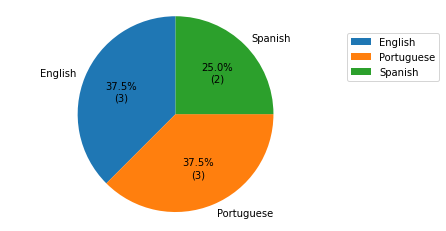

In [25]:
# Pie chart
labels = list(employees_combination.keys())
sizes = np.array(list(employees_combination.values()))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes),
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(bbox_to_anchor=(1, 0.9))
plt.show()